# Salary Data Analyses

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Salary_data.csv')

In [3]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [5]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [6]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [7]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

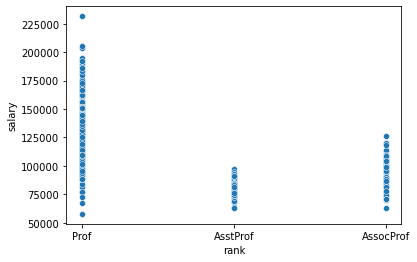

In [8]:
sns.scatterplot(x='rank',y='salary',data=df)
plt.show()

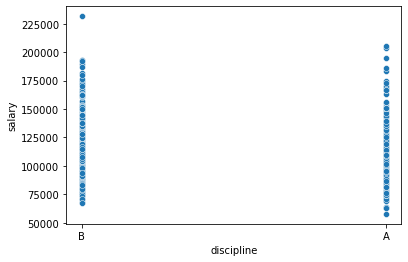

In [9]:
sns.scatterplot(x='discipline',y='salary',data=df)
plt.show()

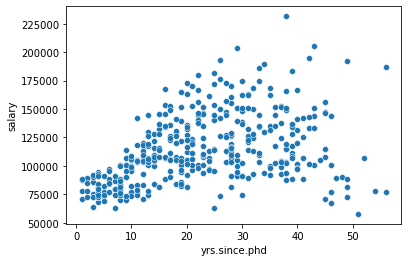

In [10]:
sns.scatterplot(x='yrs.since.phd',y='salary',data=df)
plt.show()

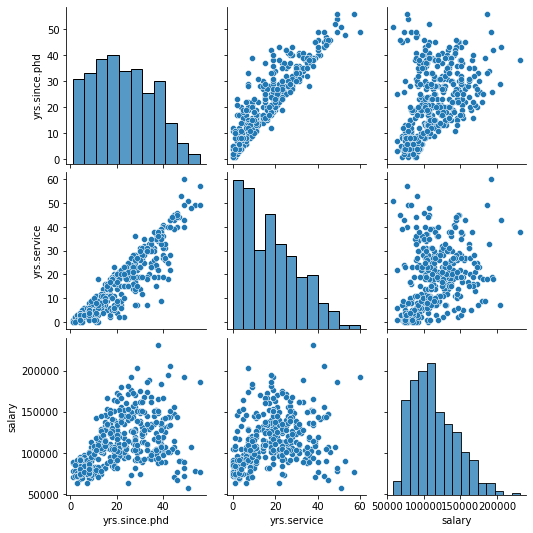

In [11]:
sns.pairplot(df)
plt.show()

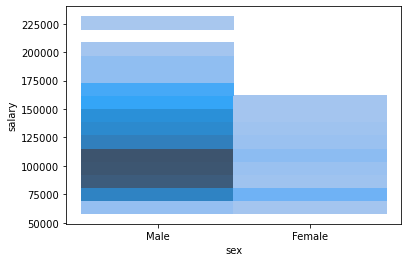

In [12]:
sns.histplot(x='sex',y='salary',data=df)
plt.show()

In [13]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


Salary has a positive correlation with experience and years since phd.
Which is good

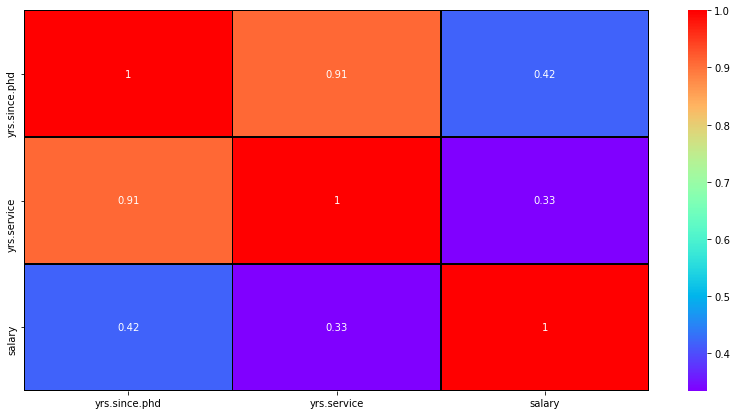

In [14]:
plt.figure(figsize=(14,7))
sns.heatmap(data=df.corr(),annot=True,linewidths=0.5,linecolor='k',cmap='rainbow')
plt.show()

# Describing Data

In [15]:
df.describe(include='all')

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397,397,397.000000,397.000000,397,397.000000
unique,3,2,NaN,NaN,2,NaN
top,Prof,B,NaN,NaN,Male,NaN
freq,266,216,NaN,NaN,358,NaN
mean,NaN,NaN,22.314861,17.614610,NaN,113706.458438
std,NaN,NaN,12.887003,13.006024,NaN,30289.038695
min,NaN,NaN,1.000000,0.000000,NaN,57800.000000
25%,NaN,NaN,12.000000,7.000000,NaN,91000.000000
50%,NaN,NaN,21.000000,16.000000,NaN,107300.000000
75%,NaN,NaN,32.000000,27.000000,NaN,134185.000000


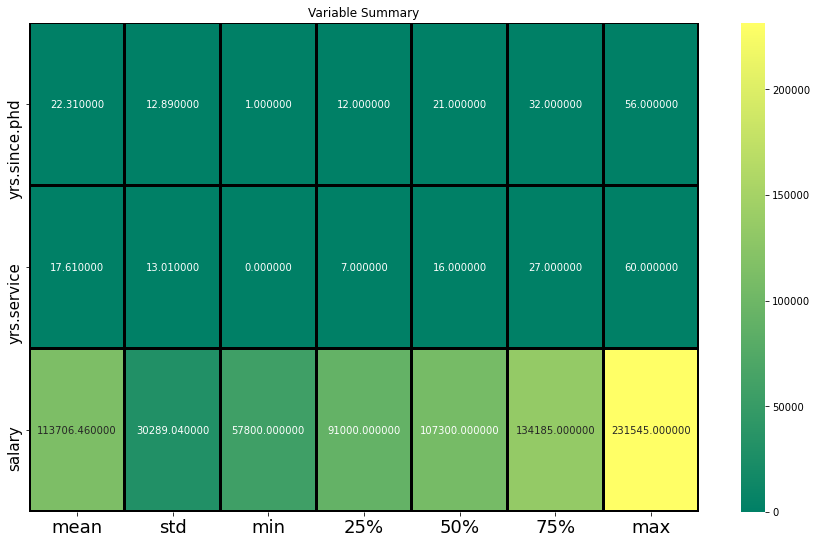

In [16]:
plt.figure(figsize=(15,9))
sns.heatmap(round(df.describe()[1:].transpose(),2),annot=True,linewidths=2,linecolor='k',fmt='f',cmap='summer')
plt.xticks(fontsize=18)
plt.yticks(fontsize=15)
plt.title('Variable Summary')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [18]:
df1=df.drop(['rank','discipline','sex'],axis=1)

# Checking Outliers

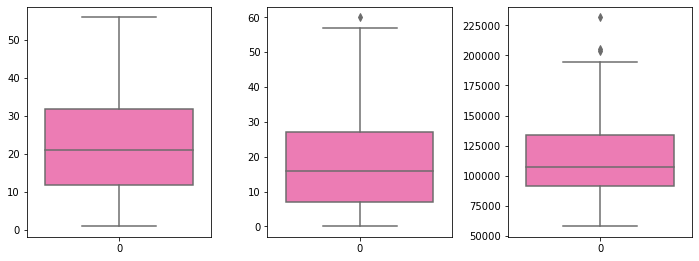

In [19]:
collst=df1.columns.values
ncol=30
nrows=14
plt.figure(figsize=(100,50))
for i in range(len(collst)):
    plt.subplot(nrows,ncol,1+i)
    sns.boxplot(data=df1[collst[i]],color='hotpink',orient='v')
    plt.tight_layout()

We can see that there are very less outliers 

# Skewness

In [20]:
df.skew()

yrs.since.phd    0.300880
yrs.service      0.650569
salary           0.714568
dtype: float64

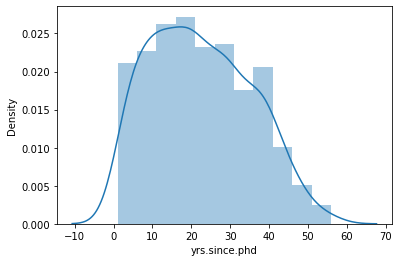

In [21]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df['yrs.since.phd'])
plt.show()

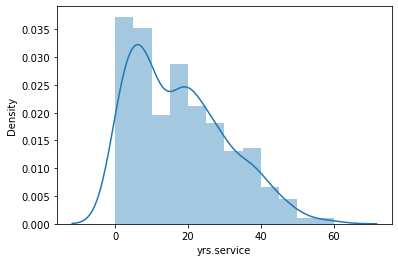

In [22]:
sns.distplot(df['yrs.service'])
plt.show()

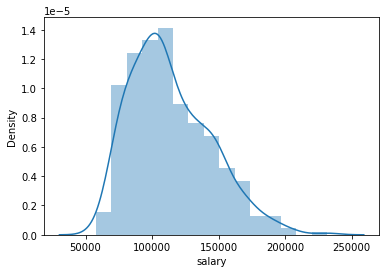

In [23]:
sns.distplot(df['salary'])
plt.show()

# Removing Outliers

In [24]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df1))
z.shape###np.abs gives positive values

(397, 3)

In [25]:
print(np.where(z>2))

(array([  6,   7,  43,  71,  77, 125, 125, 131, 131, 161, 169, 190, 194,
       198, 249, 261, 268, 271, 276, 276, 279, 282, 282, 285, 285, 290,
       292, 298, 304, 317, 330, 330, 330, 350, 350, 350, 356, 364, 383,
       389], dtype=int64), array([2, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 0,
       1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2, 0, 1, 2, 0, 2, 1, 2], dtype=int64))


In [26]:
df1_new=df1[(z<2).all(axis=1)]

In [27]:
df1_new

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500
...,...,...,...
392,33,30,103106
393,31,19,150564
394,42,25,101738
395,25,15,95329


In [28]:
df1_new.shape

(366, 3)

In [29]:
Now=df1.shape[0]-df1_new.shape[0]
print("Rows Dropped:",Now)

Rows Dropped: 31


In [30]:
print('Data loss pecentage: ',round((397-393)/397*100,4),'%')

Data loss pecentage:  1.0076 %


In [31]:
from sklearn.model_selection import train_test_split
x=df1_new.drop('salary',axis=1)
y=df1_new['salary']

In [72]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=13)

In [73]:
from sklearn.linear_model import LinearRegression
ls= LinearRegression()

In [74]:
ls.fit(xtrain,ytrain)

LinearRegression()

In [75]:
y_pred=ls.predict(xtest)
y_pred

array([ 94898.24969216, 111544.17138351,  94755.40510399, 130779.37759381,
       103435.47742007, 106721.8083819 , 104310.62688109, 125242.7916514 ,
       108025.4916074 , 107668.38013699, 127154.01709364, 132780.10726219,
        94826.82739808,  97380.85348704, 102417.4833709 , 109775.79052943,
        92272.80130911, 113347.81066757, 119331.01230652, 100952.87362519,
       135030.36224278, 125385.63623956, 134940.85801665,  95630.55456501,
       109061.56758862, 121742.19380733, 139334.68725378,  97309.43119296,
       137512.96603767, 101613.75620396,  99273.99699724, 131440.26017259,
        94898.24969216, 133798.10131136, 123278.22584712,  95630.55456501,
       117652.13567857,  96505.70402603, 118688.2116598 ,  95701.97685909,
       125438.97660159, 101756.60079212, 125046.6067012 , 105114.35404803,
       101613.75620396,  99934.87957601, 124742.83559283, 107007.49755822,
       104382.04917517, 145907.34917743, 118902.47854204, 132333.49156565,
       107739.80243107, 1

In [76]:
ls.score(xtest,ytest)

0.2380280760923742

In [66]:
x

,yrs.since.phd,yrs.service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41
...,...,...
392,33,30
393,31,19
394,42,25
395,25,15
